In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
track_data = pd.read_csv("tracks_features.csv")


In [3]:
track_data

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [4]:
#drop columns we don't need
refined_track_data_columns = track_data[["name", "album", "artists", "danceability", 
                                         "speechiness", "acousticness", "instrumentalness", 
                                         "liveness", "valence","energy", "tempo", "duration_ms", "year"]]
refined_track_data_columns.head()

,name,album,artists,danceability,speechiness,acousticness,instrumentalness,liveness,valence,energy,tempo,duration_ms,year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [5]:
renamed_track_data_columns= refined_track_data_columns.rename(columns={"name":"Song Title", "album":"Album Title",
                                          "artists":"Artists", "danceability":"Danceability", "acousticness":"Acousticness",
                                          "speechiness":"Speechiness", "instrumentalness":"Instrumentalness",
                                          "liveness":"Liveness", "valence":"Valence", "energy":"Energy", "tempo":"Tempo", "duration_ms":"Duration(ms)",
                                          "year":"Release Year"})
renamed_track_data_columns.head()

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [6]:
sampled_data = renamed_track_data_columns.sample(frac=.01)

In [7]:
sampled_data

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
850860,Song for Sanjay,The Go Round,['Inf'],0.758,0.0418,0.55600,0.842000,0.108,0.4670,0.43400,79.930,63027,2009
613326,It's Just The Sun,Classics,['Don McLean'],0.589,0.0273,0.42700,0.000012,0.327,0.7880,0.42600,107.761,152160,1992
222982,Broken Bicycles,You'd Be Paradise,['Mary Foster Conklin'],0.469,0.0345,0.85900,0.004540,0.100,0.1190,0.08410,80.506,274853,2001
959754,What Good Is Love,What Good Is Love,['Paul Rey'],0.559,0.0554,0.04520,0.000000,0.128,0.4000,0.58300,94.151,184758,2017
914968,Nightmares on Forsaken Soil,Candelabia,['Candles and Wraiths'],0.387,0.0542,0.00296,0.000042,0.282,0.2300,0.98100,105.290,281893,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
948054,The Wilderness-Romance (After 10 Songs No. 2),"Balakirev: Complete Piano Works, Vol. 4","['Mily Balakirev', 'Nicholas Walker']",0.436,0.0463,0.99500,0.879000,0.100,0.0352,0.00723,65.973,201373,2019
641005,"Carnaval, Op. 9: No. 7. Coquette","Schumann: Carnaval, Davidsbündlertänze & Papil...","['Robert Schumann', 'Boris Giltburg']",0.338,0.0555,0.99200,0.846000,0.162,0.3650,0.06280,170.910,74387,2015
180393,Blackbird,Solitaire,['Uri Caine'],0.360,0.0385,0.99100,0.888000,0.136,0.1900,0.24400,68.216,363133,2015
1110504,Diamonds - Audiotree Live Version,Basement Revolver on Audiotree Live,['Basement Revolver'],0.273,0.0319,0.91900,0.112000,0.205,0.0635,0.16300,66.329,195084,2017


In [8]:
sampled_data["Energy"].max()

1.0

In [9]:
sampled_data["Energy"].min()

0.0

In [10]:
energy_bins = [0, .2, .4, .6, .8, 1]
energy_groupings = ["Energy <=.2", "Energy .2-.4", "Energy .4-.6", "Energy .6-.8", "Energy .8-1"]
sampled_data["Energy"] = pd.cut(sampled_data["Energy"], energy_bins, labels=energy_groupings,
                                     include_lowest=True)
sampled_data

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
850860,Song for Sanjay,The Go Round,['Inf'],0.758,0.0418,0.55600,0.842000,0.108,0.4670,Energy .4-.6,79.930,63027,2009
613326,It's Just The Sun,Classics,['Don McLean'],0.589,0.0273,0.42700,0.000012,0.327,0.7880,Energy .4-.6,107.761,152160,1992
222982,Broken Bicycles,You'd Be Paradise,['Mary Foster Conklin'],0.469,0.0345,0.85900,0.004540,0.100,0.1190,Energy <=.2,80.506,274853,2001
959754,What Good Is Love,What Good Is Love,['Paul Rey'],0.559,0.0554,0.04520,0.000000,0.128,0.4000,Energy .4-.6,94.151,184758,2017
914968,Nightmares on Forsaken Soil,Candelabia,['Candles and Wraiths'],0.387,0.0542,0.00296,0.000042,0.282,0.2300,Energy .8-1,105.290,281893,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
948054,The Wilderness-Romance (After 10 Songs No. 2),"Balakirev: Complete Piano Works, Vol. 4","['Mily Balakirev', 'Nicholas Walker']",0.436,0.0463,0.99500,0.879000,0.100,0.0352,Energy <=.2,65.973,201373,2019
641005,"Carnaval, Op. 9: No. 7. Coquette","Schumann: Carnaval, Davidsbündlertänze & Papil...","['Robert Schumann', 'Boris Giltburg']",0.338,0.0555,0.99200,0.846000,0.162,0.3650,Energy <=.2,170.910,74387,2015
180393,Blackbird,Solitaire,['Uri Caine'],0.360,0.0385,0.99100,0.888000,0.136,0.1900,Energy .2-.4,68.216,363133,2015
1110504,Diamonds - Audiotree Live Version,Basement Revolver on Audiotree Live,['Basement Revolver'],0.273,0.0319,0.91900,0.112000,0.205,0.0635,Energy <=.2,66.329,195084,2017


In [11]:
#getting count of each category and converting to percentage for pie chart
energy_lessthan_point2 = ((sampled_data.loc[sampled_data["Energy"]=='Energy <=.2'].count())/12040)*100
energy_lessthan_point2

Song Title          20.747508
Album Title         20.747508
Artists             20.747508
Danceability        20.747508
Speechiness         20.747508
Acousticness        20.747508
Instrumentalness    20.747508
Liveness            20.747508
Valence             20.747508
Energy              20.747508
Tempo               20.747508
Duration(ms)        20.747508
Release Year        20.747508
dtype: float64

In [12]:
energy_point2topoint4 = ((sampled_data.loc[sampled_data["Energy"]=='Energy .2-.4'].count())/12040)*100
energy_point2topoint4

Song Title          17.990033
Album Title         17.990033
Artists             17.990033
Danceability        17.990033
Speechiness         17.990033
Acousticness        17.990033
Instrumentalness    17.990033
Liveness            17.990033
Valence             17.990033
Energy              17.990033
Tempo               17.990033
Duration(ms)        17.990033
Release Year        17.990033
dtype: float64

In [13]:
energy_point4topoint6 = ((sampled_data.loc[sampled_data["Energy"]=='Energy .4-.6'].count())/12040)*100
energy_point4topoint6

Song Title          19.244186
Album Title         19.244186
Artists             19.244186
Danceability        19.244186
Speechiness         19.244186
Acousticness        19.244186
Instrumentalness    19.244186
Liveness            19.244186
Valence             19.244186
Energy              19.244186
Tempo               19.244186
Duration(ms)        19.244186
Release Year        19.244186
dtype: float64

In [14]:
energy_point6topoint8 = ((sampled_data.loc[sampled_data["Energy"]=='Energy .6-.8'].count())/12040)*100
energy_point6topoint8

Song Title          20.589701
Album Title         20.589701
Artists             20.589701
Danceability        20.589701
Speechiness         20.589701
Acousticness        20.589701
Instrumentalness    20.589701
Liveness            20.589701
Valence             20.589701
Energy              20.589701
Tempo               20.589701
Duration(ms)        20.589701
Release Year        20.589701
dtype: float64

In [15]:
energy_point8to1 = ((sampled_data.loc[sampled_data["Energy"]=='Energy .8-1'].count())/12040)*100
energy_point8to1

Song Title          21.428571
Album Title         21.428571
Artists             21.428571
Danceability        21.428571
Speechiness         21.428571
Acousticness        21.428571
Instrumentalness    21.428571
Liveness            21.428571
Valence             21.428571
Energy              21.428571
Tempo               21.428571
Duration(ms)        21.428571
Release Year        21.428571
dtype: float64

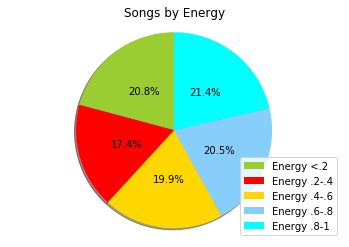

In [35]:
#pie chart
labels = ["Energy <.2", "Energy .2-.4", "Energy .4-.6", "Energy .6-.8", "Energy .8-1"]
sizes = [20.830565, 17.350498, 19.883721, 20.539867, 21.395349]
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 
          'cyan','lightcoral','blue','pink', 'darkgreen', 
          'yellow']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, shadow=True, startangle=90, radius=1.2)
patches, texts, auto = ax1.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%' )
plt.title("Songs by Energy")
plt.legend(patches, labels, loc="lower right")
ax1.axis('equal')
plt.savefig("Images/energy-pie.png")
plt.show()